In [74]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin as sin
import random
import time
from scipy import signal
from numpy import exp
import cmath

import warnings
warnings.filterwarnings("ignore")

from scipy.signal import butter
from scipy.signal import freqz

from time import perf_counter

import math

## QUESTION 1

### PART A

In [7]:
def x1(t):
    x1=[]
    for i in t:
        x1.append((9*sin(10*np.pi*i))+(7*sin(30*np.pi*i))+(5*sin(50*np.pi*i))+(3*sin(100*np.pi*i)))
    return x1


Text(0.5, 1.0, 'plot of x1(t)')

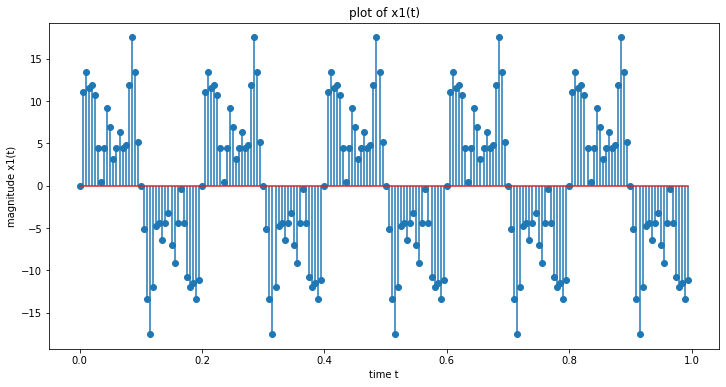

In [19]:
samp_freq1=200
samp_time1=1/samp_freq1

t=np.arange(0,1,samp_time1)

plt.figure(figsize = (12, 6))
plt.stem(t,x1(t))
plt.xlabel('time t')
plt.ylabel('magnitude x1(t)')
plt.title('plot of x1(t)')

### PART B

In [17]:
#defining DFT

def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)   
    return X


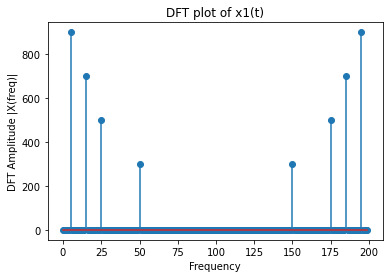

In [29]:
X = DFT(x1(t))

sr=200 #fs=200hz
N = 200
n = np.arange(N)
T = N/sr
freq = n/T 


plt.stem(freq, np.abs(X))
plt.xlabel('Frequency')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.title('DFT plot of x1(t)')
plt.show()

In [21]:
#since required is one sided signal..comsider N/2
N/2

200

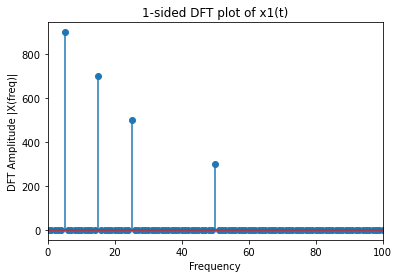

In [32]:
#for 1-sided magnitude spectrum

plt.stem(freq, np.abs(X))
plt.xlim(0, 100)
plt.xlabel('Frequency')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.title('1-sided DFT plot of x1(t)')
plt.show()

### PART C

In [34]:
def butter_bandpass(lower_cut, higher_cut, fs, order=6):
    lower = lower_cut / (fs/2)
    higher = higher_cut / (fs/2)
    b, a = butter(order, [lower, higher], btype='band')
    return b, a

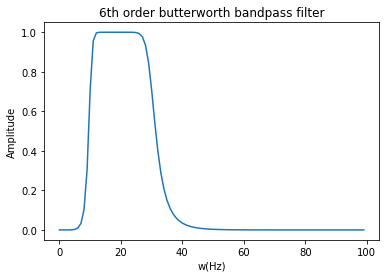

In [37]:
b, a = butter_bandpass(10, 30, 200, order=6)
w, h = freqz(b, a, worN=100)
plt.plot(((fs/2)/np.pi)*w, abs(h), label="order = 6")
plt.xlabel('w(Hz)')
plt.ylabel('Amplitude')
plt.title('6th order butterworth bandpass filter')
plt.show()

### PART D

<StemContainer object of 3 artists>

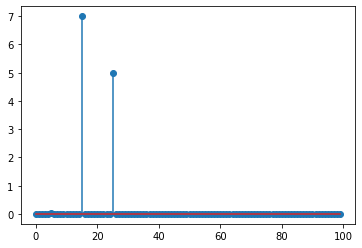

In [38]:
#multiplying the frequency response of bandpass filter and DFT

filter_spec=h*X_oneside
plt.stem(f_oneside,abs(filter_spec))

#we can observe that only two frequencies are in the limit 10 to 30
#hence only frequncies 15,25hz are there in the output

### PART E

In [39]:
def IDFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X
 
Inverse_DFT=IDFT(filter_spec)

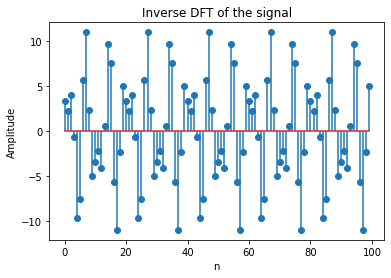

In [44]:
plt.stem(Inverse_DFT)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Inverse DFT of the signal')
plt.show()

## QUESTION 2

### PART A

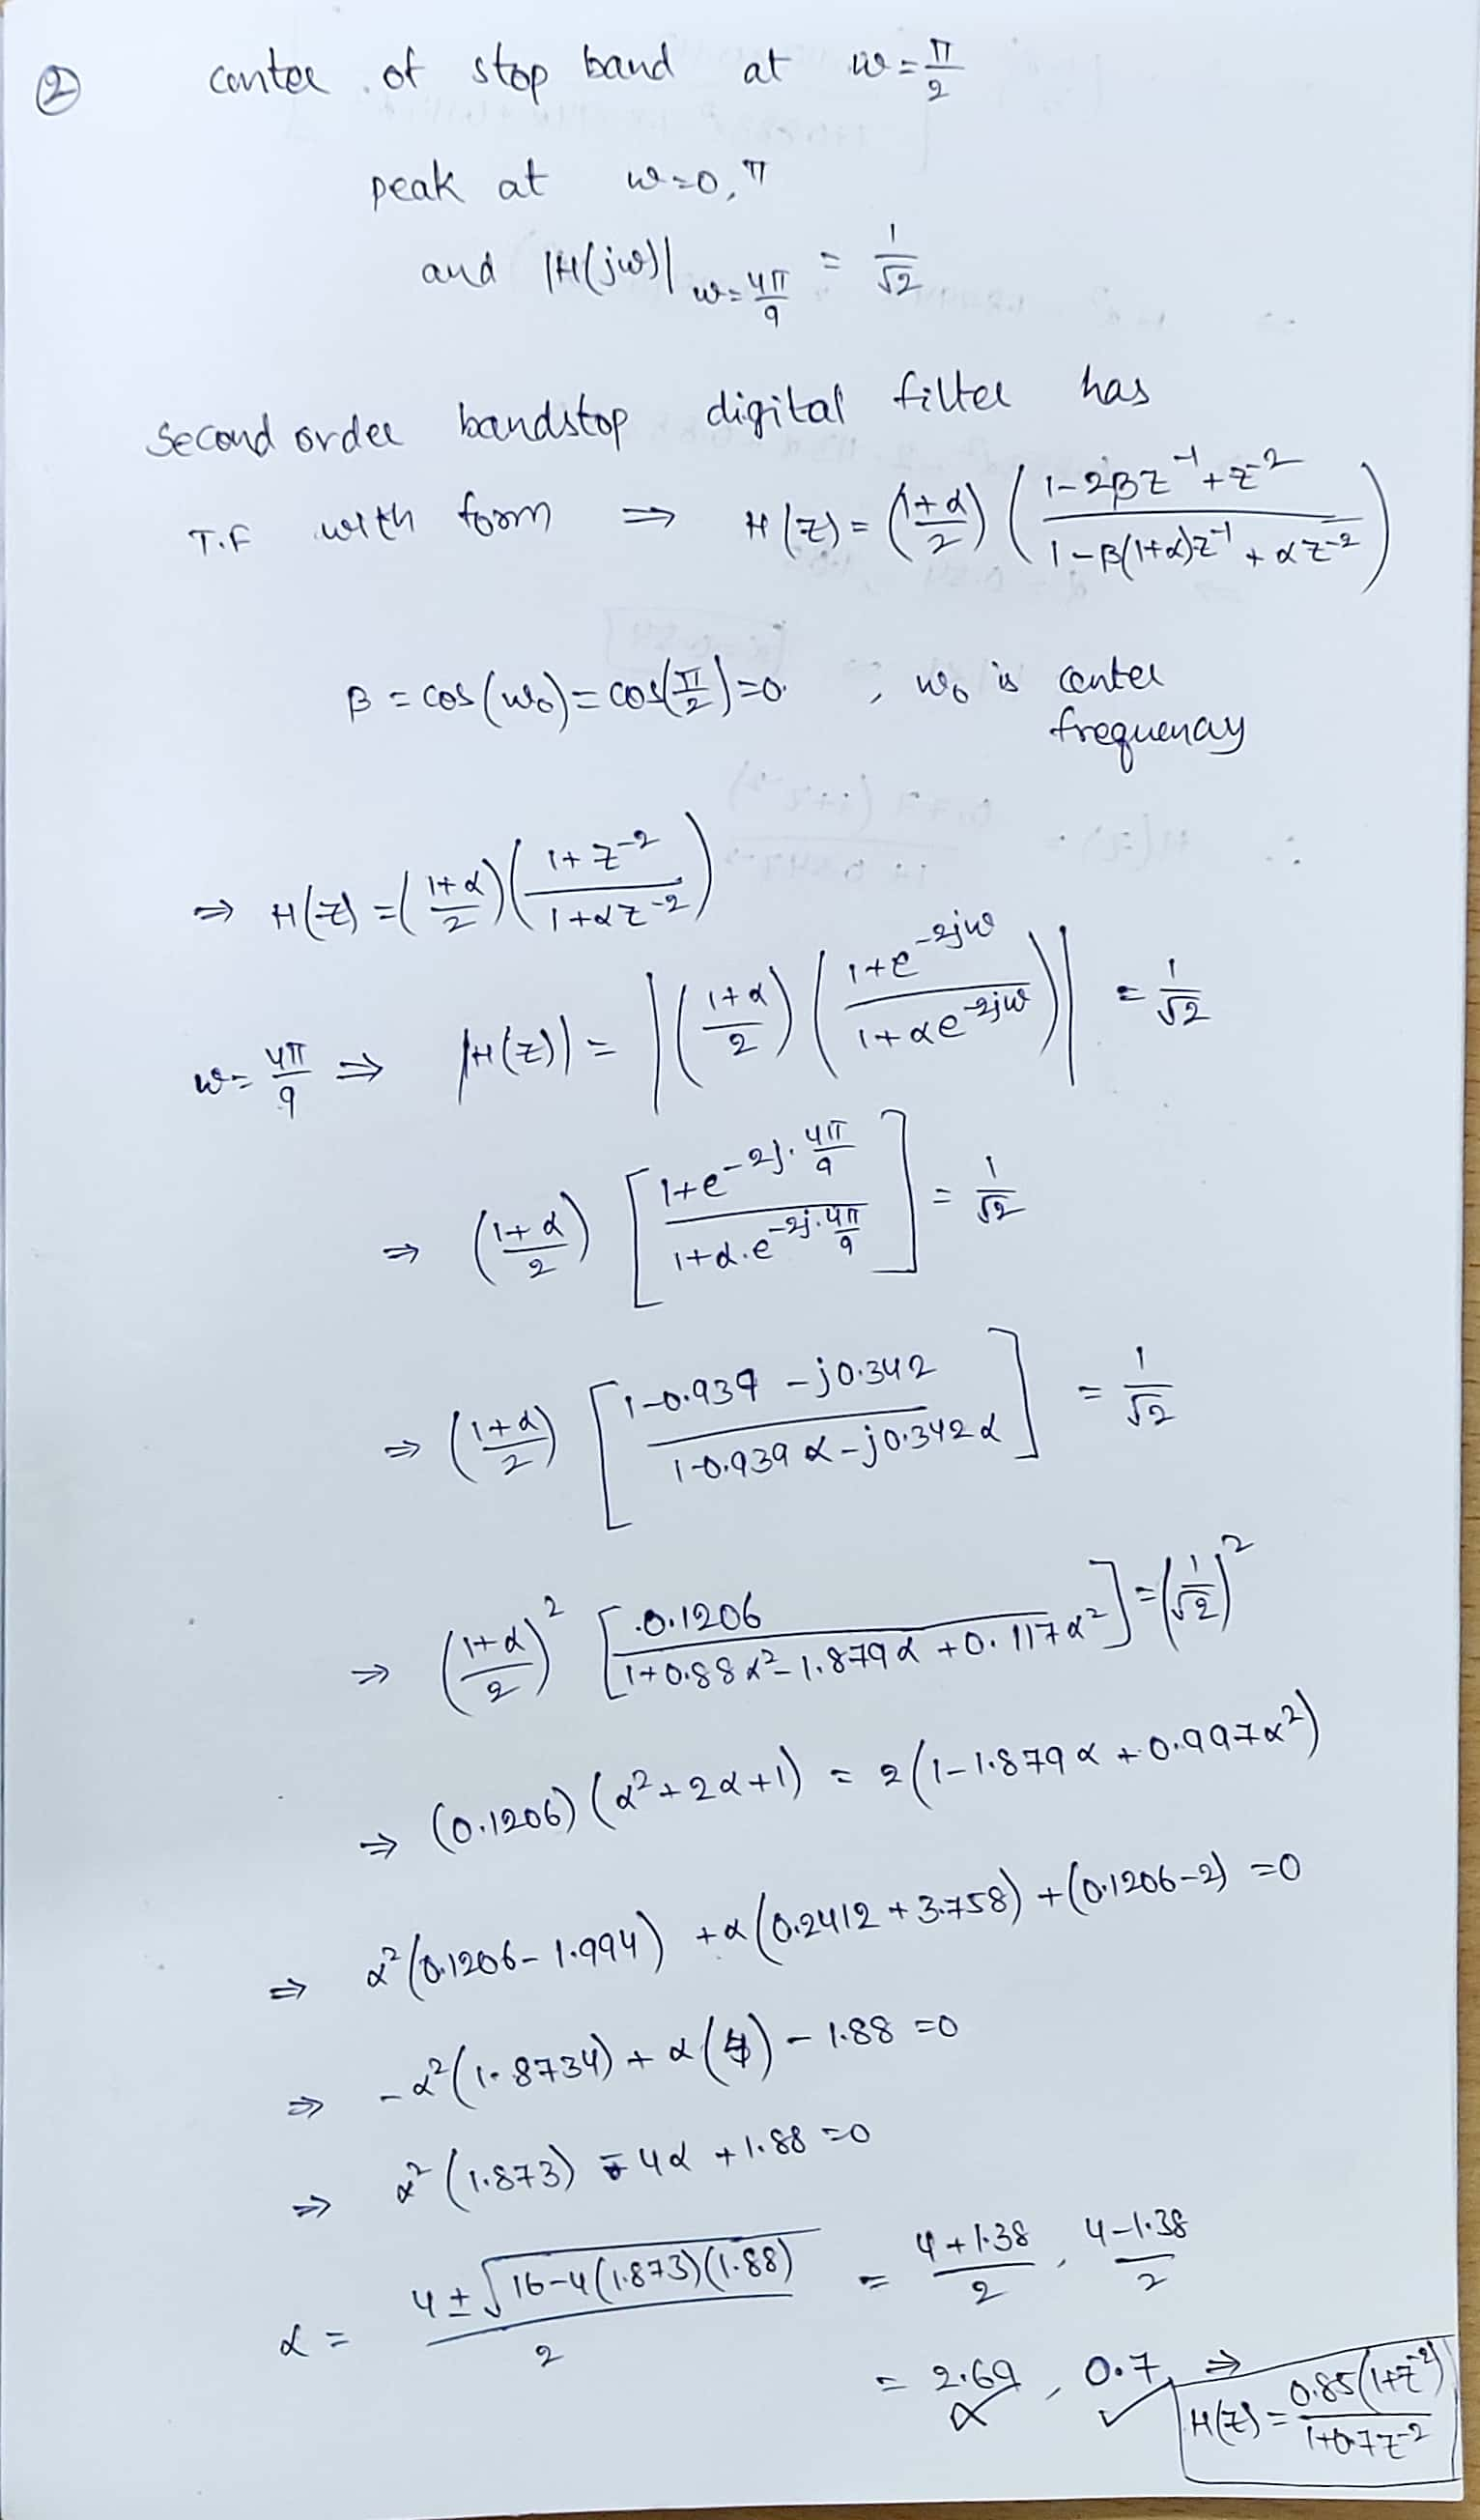

The poles of H(z) are: [-0.+0.83666003j  0.-0.83666003j]
The zeros of H(z) are: [-0.+1.j  0.-1.j]


<Figure size 1008x1008 with 0 Axes>

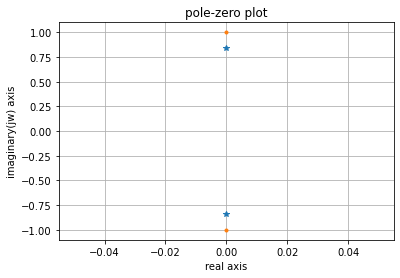

In [181]:

b=[0.85,0,0.85]
a=[1,0,0.7]

z,p,k=signal.tf2zpk(b,a)
print('The poles of H(z) are:',p)
print('The zeros of H(z) are:',z)

x_poles=p.real
y_poles=p.imag

x_zeros=z.real
y_zeros=z.imag

plt.figure(figsize=(14,14))
figur,ax=plt.subplots(1,1)

plt.plot(x_poles,y_poles,'*')
plt.plot(x_zeros,y_zeros,'.')

plt.xlabel('real axis')
plt.ylabel('imaginary(jw) axis')
plt.title('pole-zero plot')
plt.grid()
plt.show()

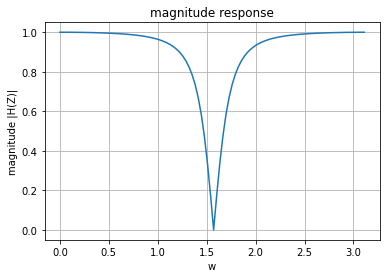

In [183]:
#magnitude response

w,h=signal.freqz(b,a,worN=100)
plt.plot(w,abs(h))
plt.title('magnitude response')
plt.xlabel('w')
plt.ylabel('magnitude |H(Z)|')
plt.grid()
plt.show()



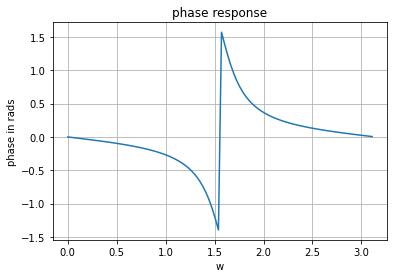

In [184]:
#phase response

plt.plot(w,np.angle(h))
plt.title('phase response')
plt.xlabel('w')
plt.ylabel('phase in rads')
plt.grid()
plt.show()

### PART B

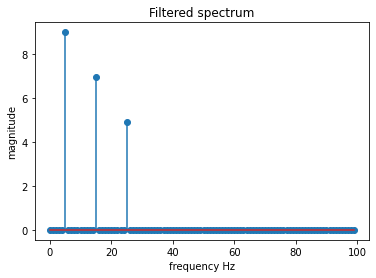

In [190]:
filtered_bandstop=h*X_oneside
plt.stem(abs(filtered_bandstop))
plt.xlabel('frequency Hz')
plt.ylabel('magnitude')
plt.title('Filtered spectrum')
plt.show()

### PART C

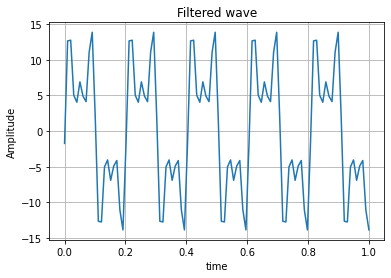

In [188]:
t=np.linspace(0,1,100)
plt.plot(t,IDFT(filtered_bandstop))

plt.title('Filtered wave')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

## QUESTION 3

### PART A

In [52]:
#given transfer function...numerator and denominator are written in array 
numer=[-0.2,0.18,0.4,1]
denom=[1,0.4,0.18,-0.2]
zeroes,poles,k=signal.tf2zpk(numer,denom) #k represents the gain

In [53]:
print('Poles of H(z):',poles)
print('Zeros of H(z):',zeroes)

Poles of H(z): [-0.4+0.58309519j -0.4-0.58309519j  0.4+0.j        ]
Zeros of H(z): [ 2.5+0.j         -0.8+1.16619038j -0.8-1.16619038j]


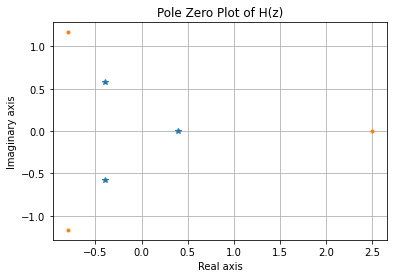

In [54]:
#poles of H(z)
x_poles=poles.real
y_poles=poles.imag

#zeroes of H(z)
x_zeros=zeroes.real
y_zeros=zeroes.imag

plt.title('Pole Zero Plot of H(z)')
plt.plot(x_poles,y_poles,'*')
plt.plot(x_zeros,y_zeros,'.')
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.grid()

### PART B

In [63]:
#defining function H(Z) in terms of w
#z=e^(-1j*w)

def H(w):
    return (-0.2+0.18*exp(-1j*w)+0.4*exp(-1j*2*w)+exp(-1j*3*w))/(1+0.4*exp(-1j*w)+0.18*exp(-1j*2*w)-0.2*exp(-1j*3*w))



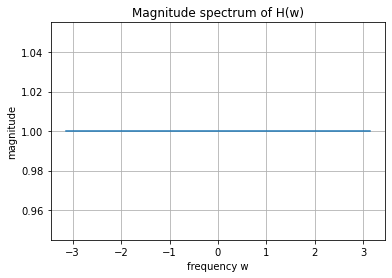

In [107]:
#Magnitude spectrum

w=np.linspace(-np.pi,np.pi,1000)
mag=[abs(H(i)) for i in w]

plt.plot(w,mag)
plt.xlabel('frequency w')
plt.ylabel('magnitude')
plt.title('Magnitude spectrum of H(w)')
plt.grid()
plt.show()

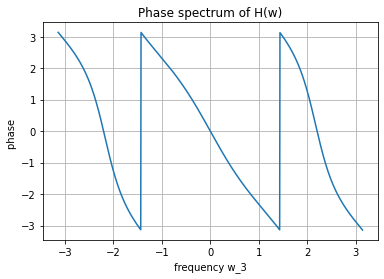

In [108]:
#Phase spectrum of H(w)

w_3=np.linspace(-np.pi,np.pi,1000)
phase=[np.angle(H(i)) for i in w_3]

plt.plot(w_3,phase)
plt.xlabel('frequency w_3')
plt.ylabel('phase ')
plt.title('Phase spectrum of H(w)')
plt.grid()
plt.show()


we can observe from the phase spectrum plot that this is a All pass filter

## QUESTION 4

### PART A

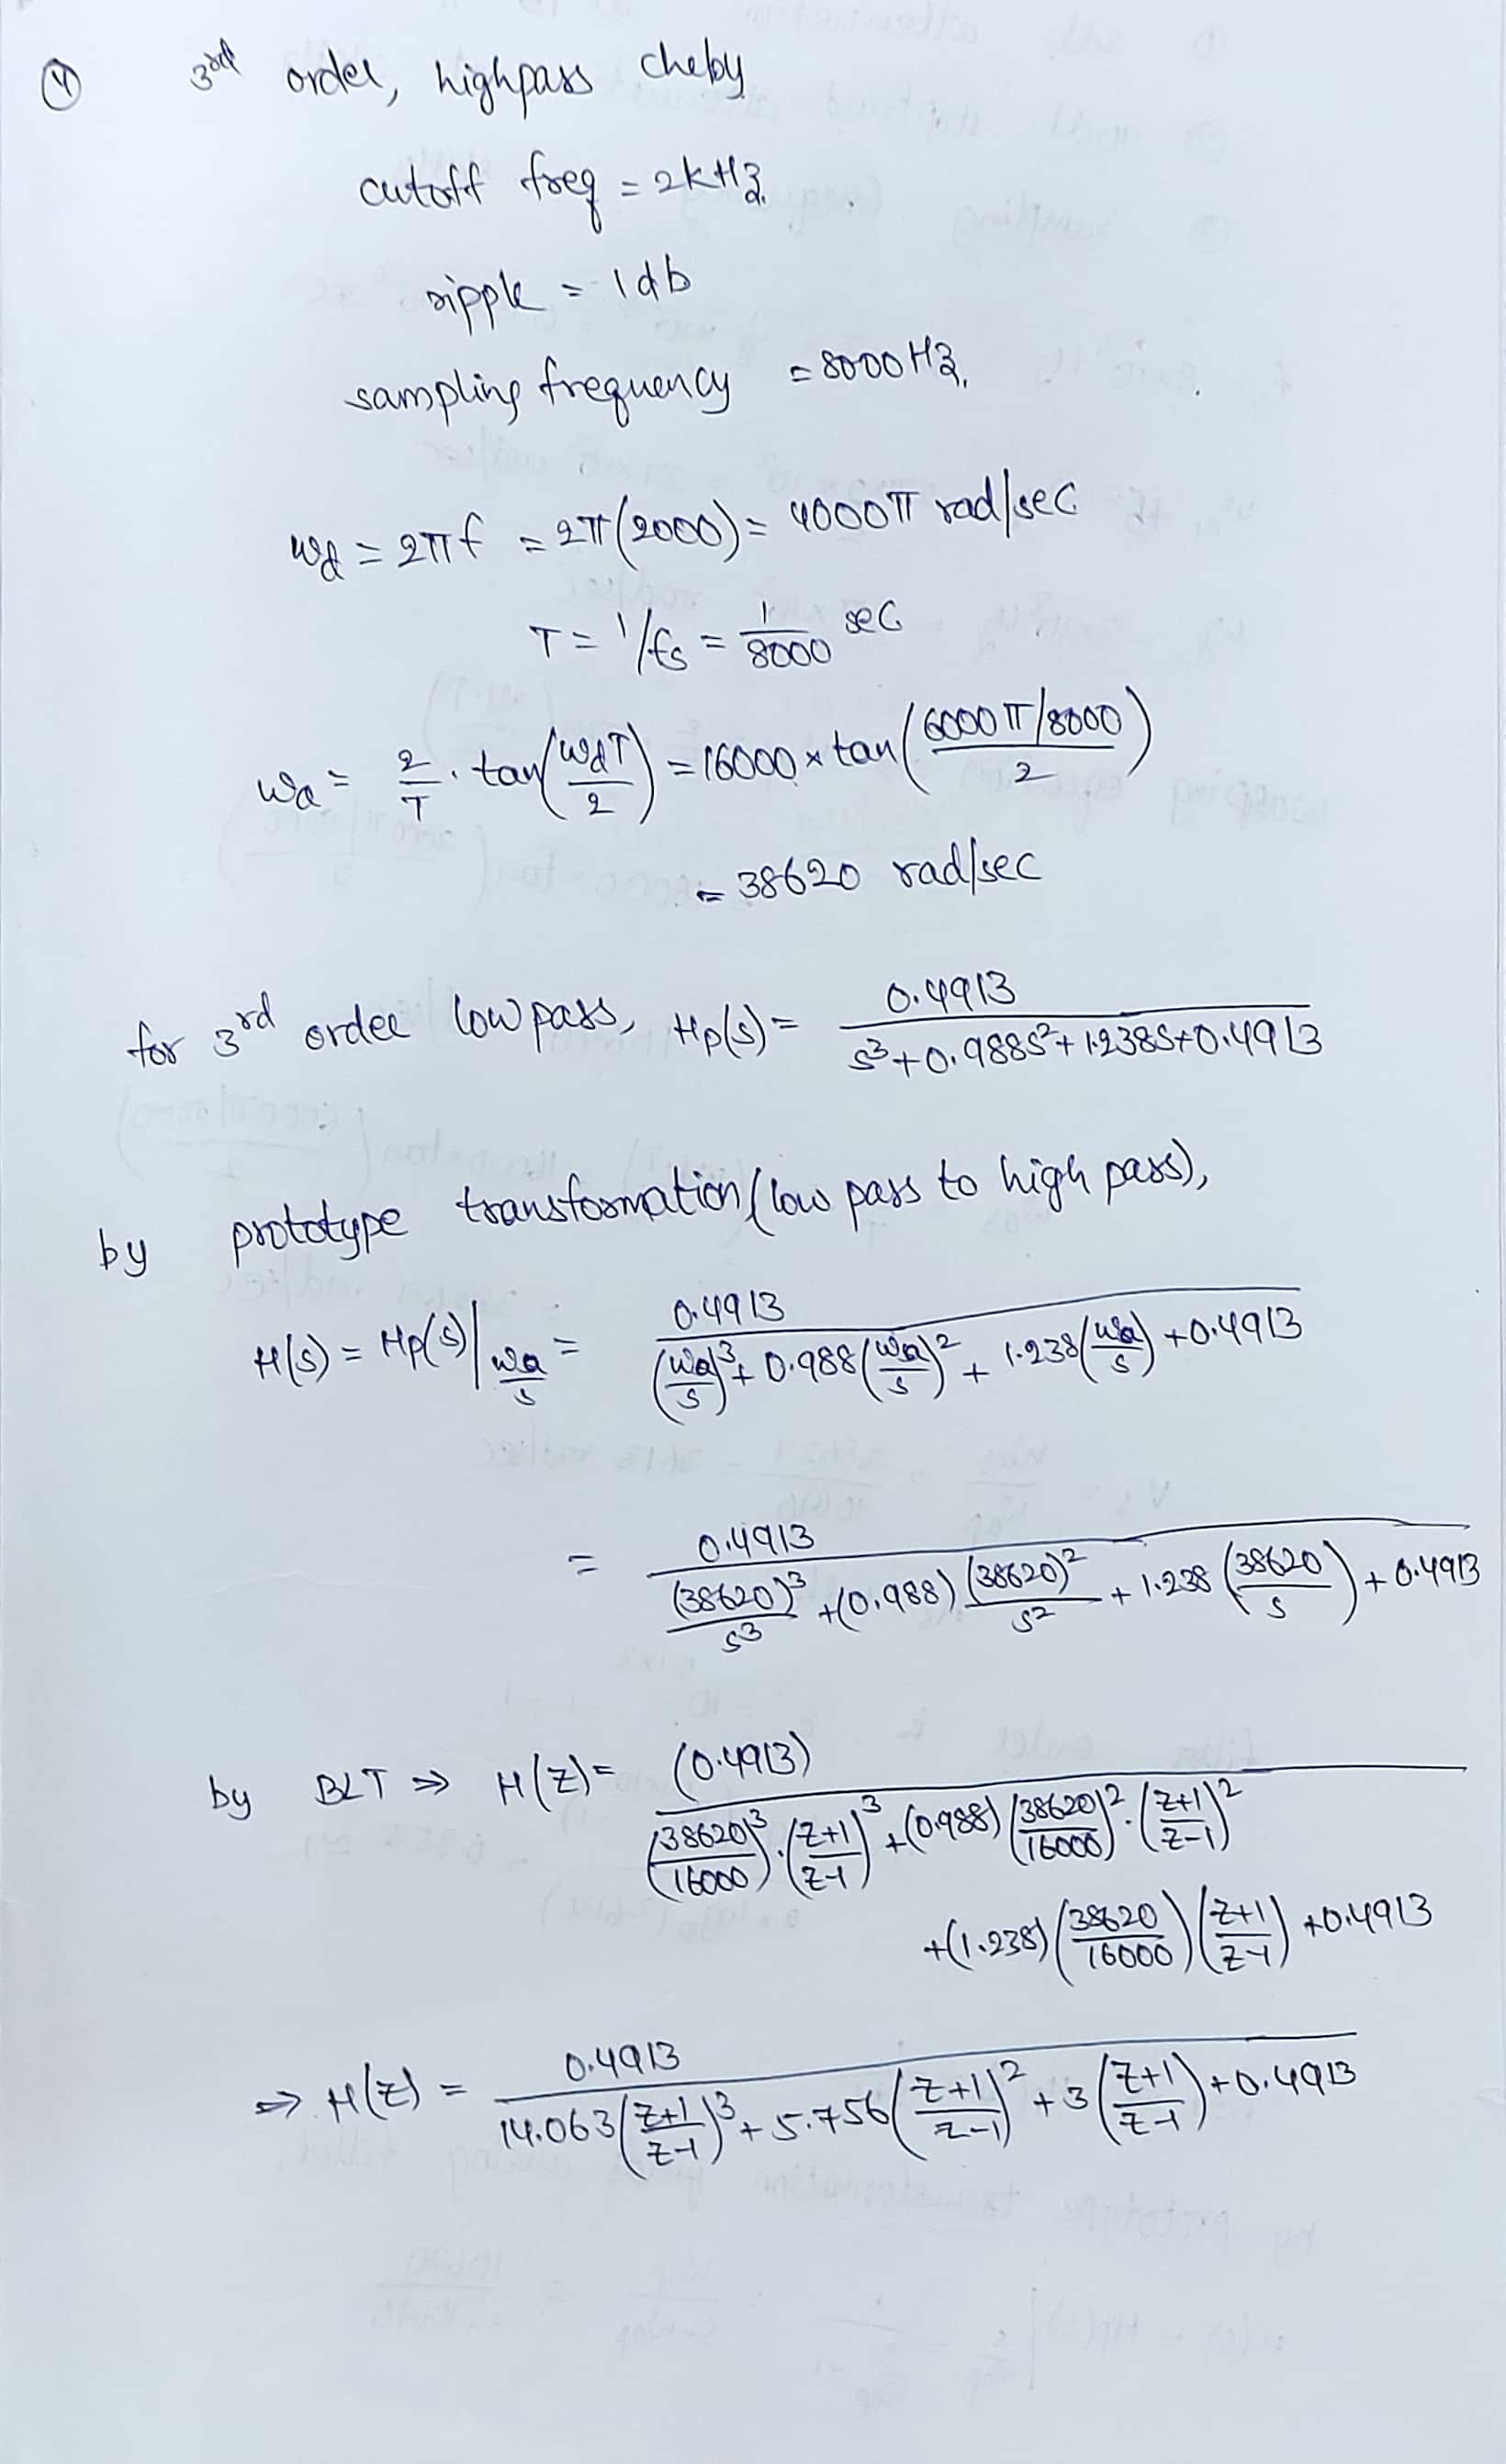

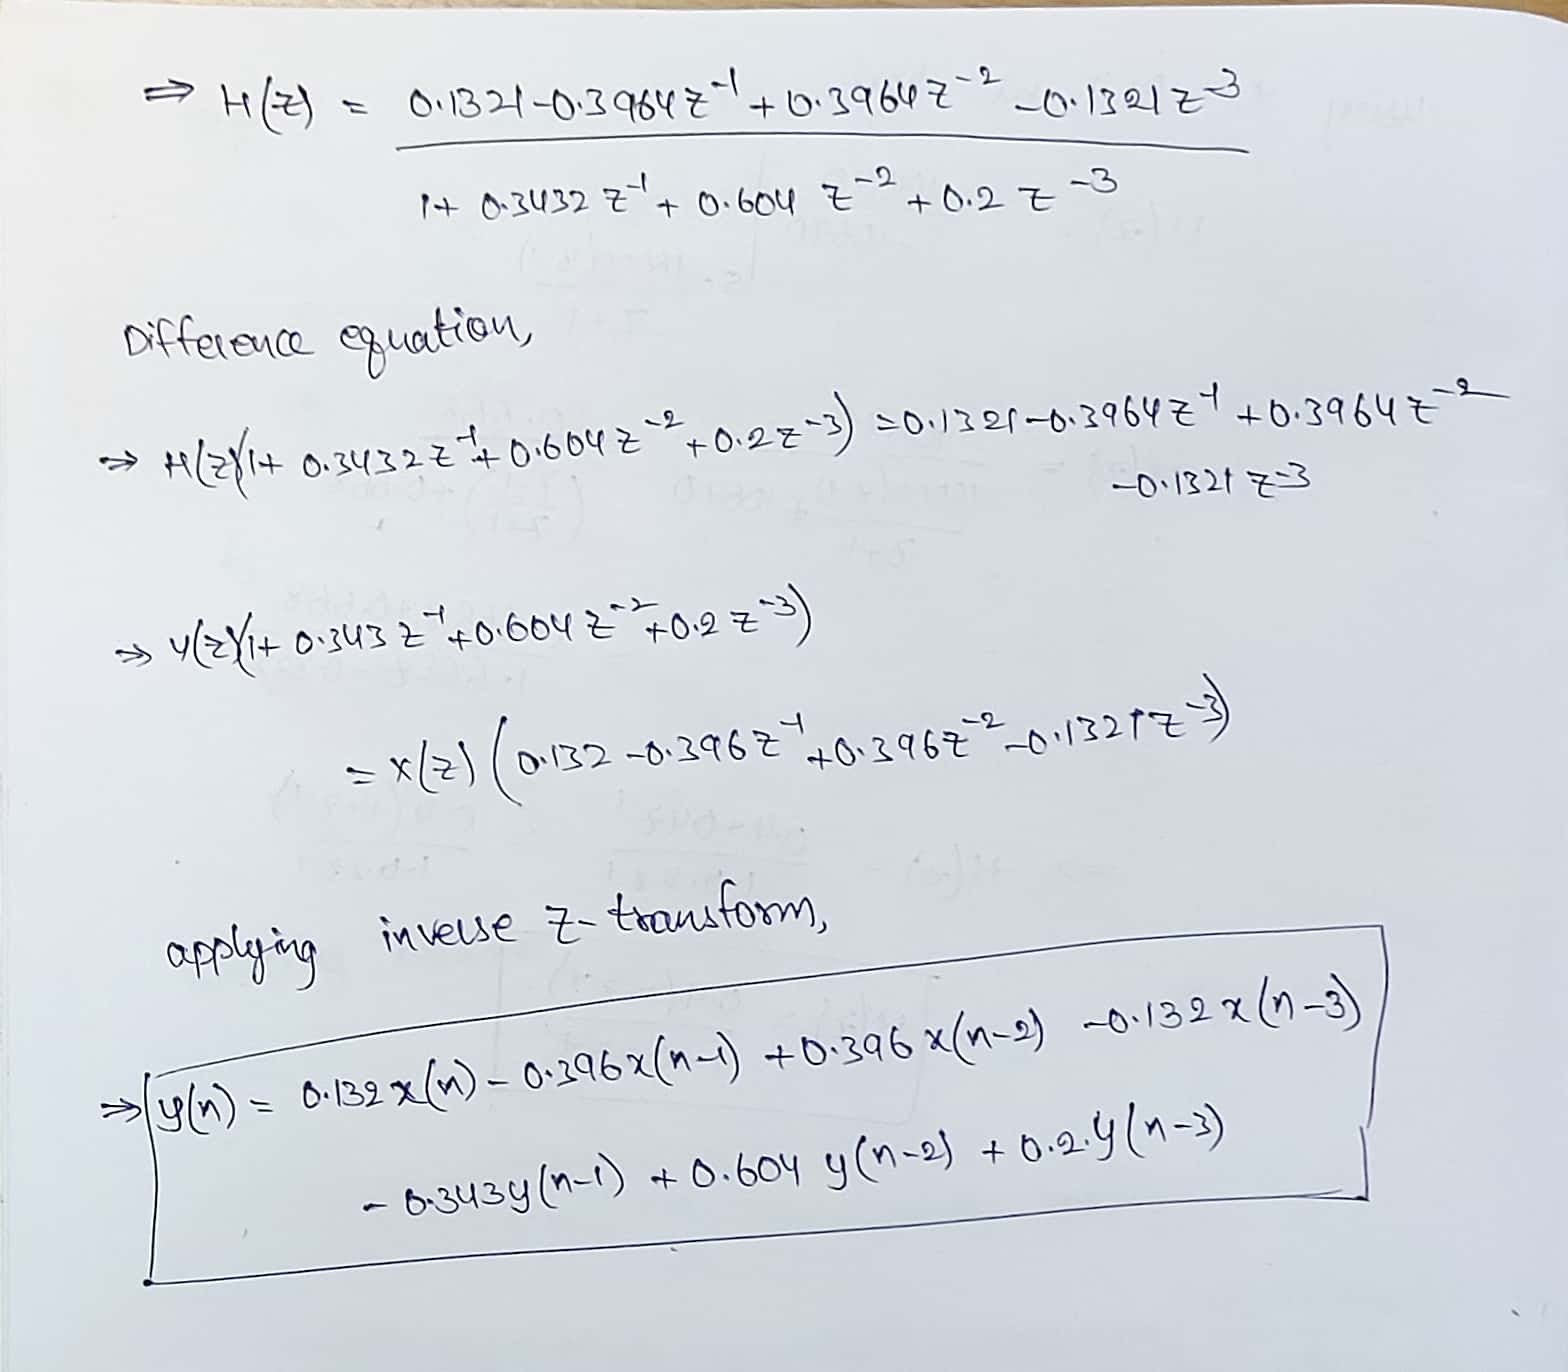

### PART B

In [103]:
#numerator and denominator from above expression H(Z)

numer_4=[0.1321,-0.3964,0.3964,-0.1321]
denom_4=[1,0.3432,0.6044,0.2041]

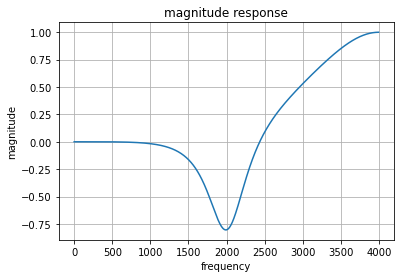

In [109]:
#Magnitude response of H(w)

w4,h4=signal.freqz(b=numer_4,a=denom_4,worN=1000)

f4=w4*8000/(2*np.pi)

plt.plot(f4,h4)
plt.title('magnitude response')
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.grid()
plt.show()

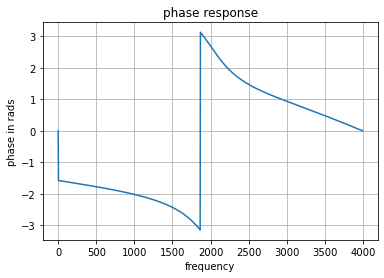

In [112]:
#Phase spectrum of H(z)

plt.plot(f4,np.angle(h4))
plt.title('phase response')
plt.xlabel('frequency')
plt.ylabel('phase in rads')
plt.grid()
plt.show()

### PART C

In [115]:
z,p,k=signal.tf2zpk(numer_4,denom_4)

print('The zeros are:',z)
print('The poles are:',p)

The zeros are: [1.02789478 1.         0.97286222]
The poles are: [-0.00231568+0.77641909j -0.00231568-0.77641909j -0.33856864+0.j        ]


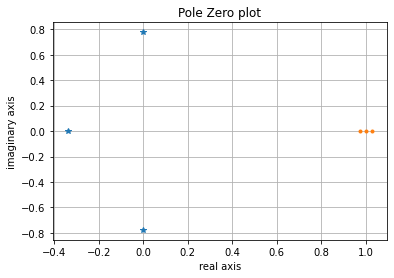

In [120]:
#poles
x_poles=p.real
y_poles=p.imag

#zeroes
x_zeros=z.real
y_zeros=z.imag

plt.figure(figsize=(6,4))
plt.plot(x_poles,y_poles,'*')
plt.plot(x_zeros,y_zeros,'.')

plt.title('Pole Zero plot')
plt.ylabel('imaginary axis')
plt.xlabel('real axis')
plt.grid()

## QUESTION 5

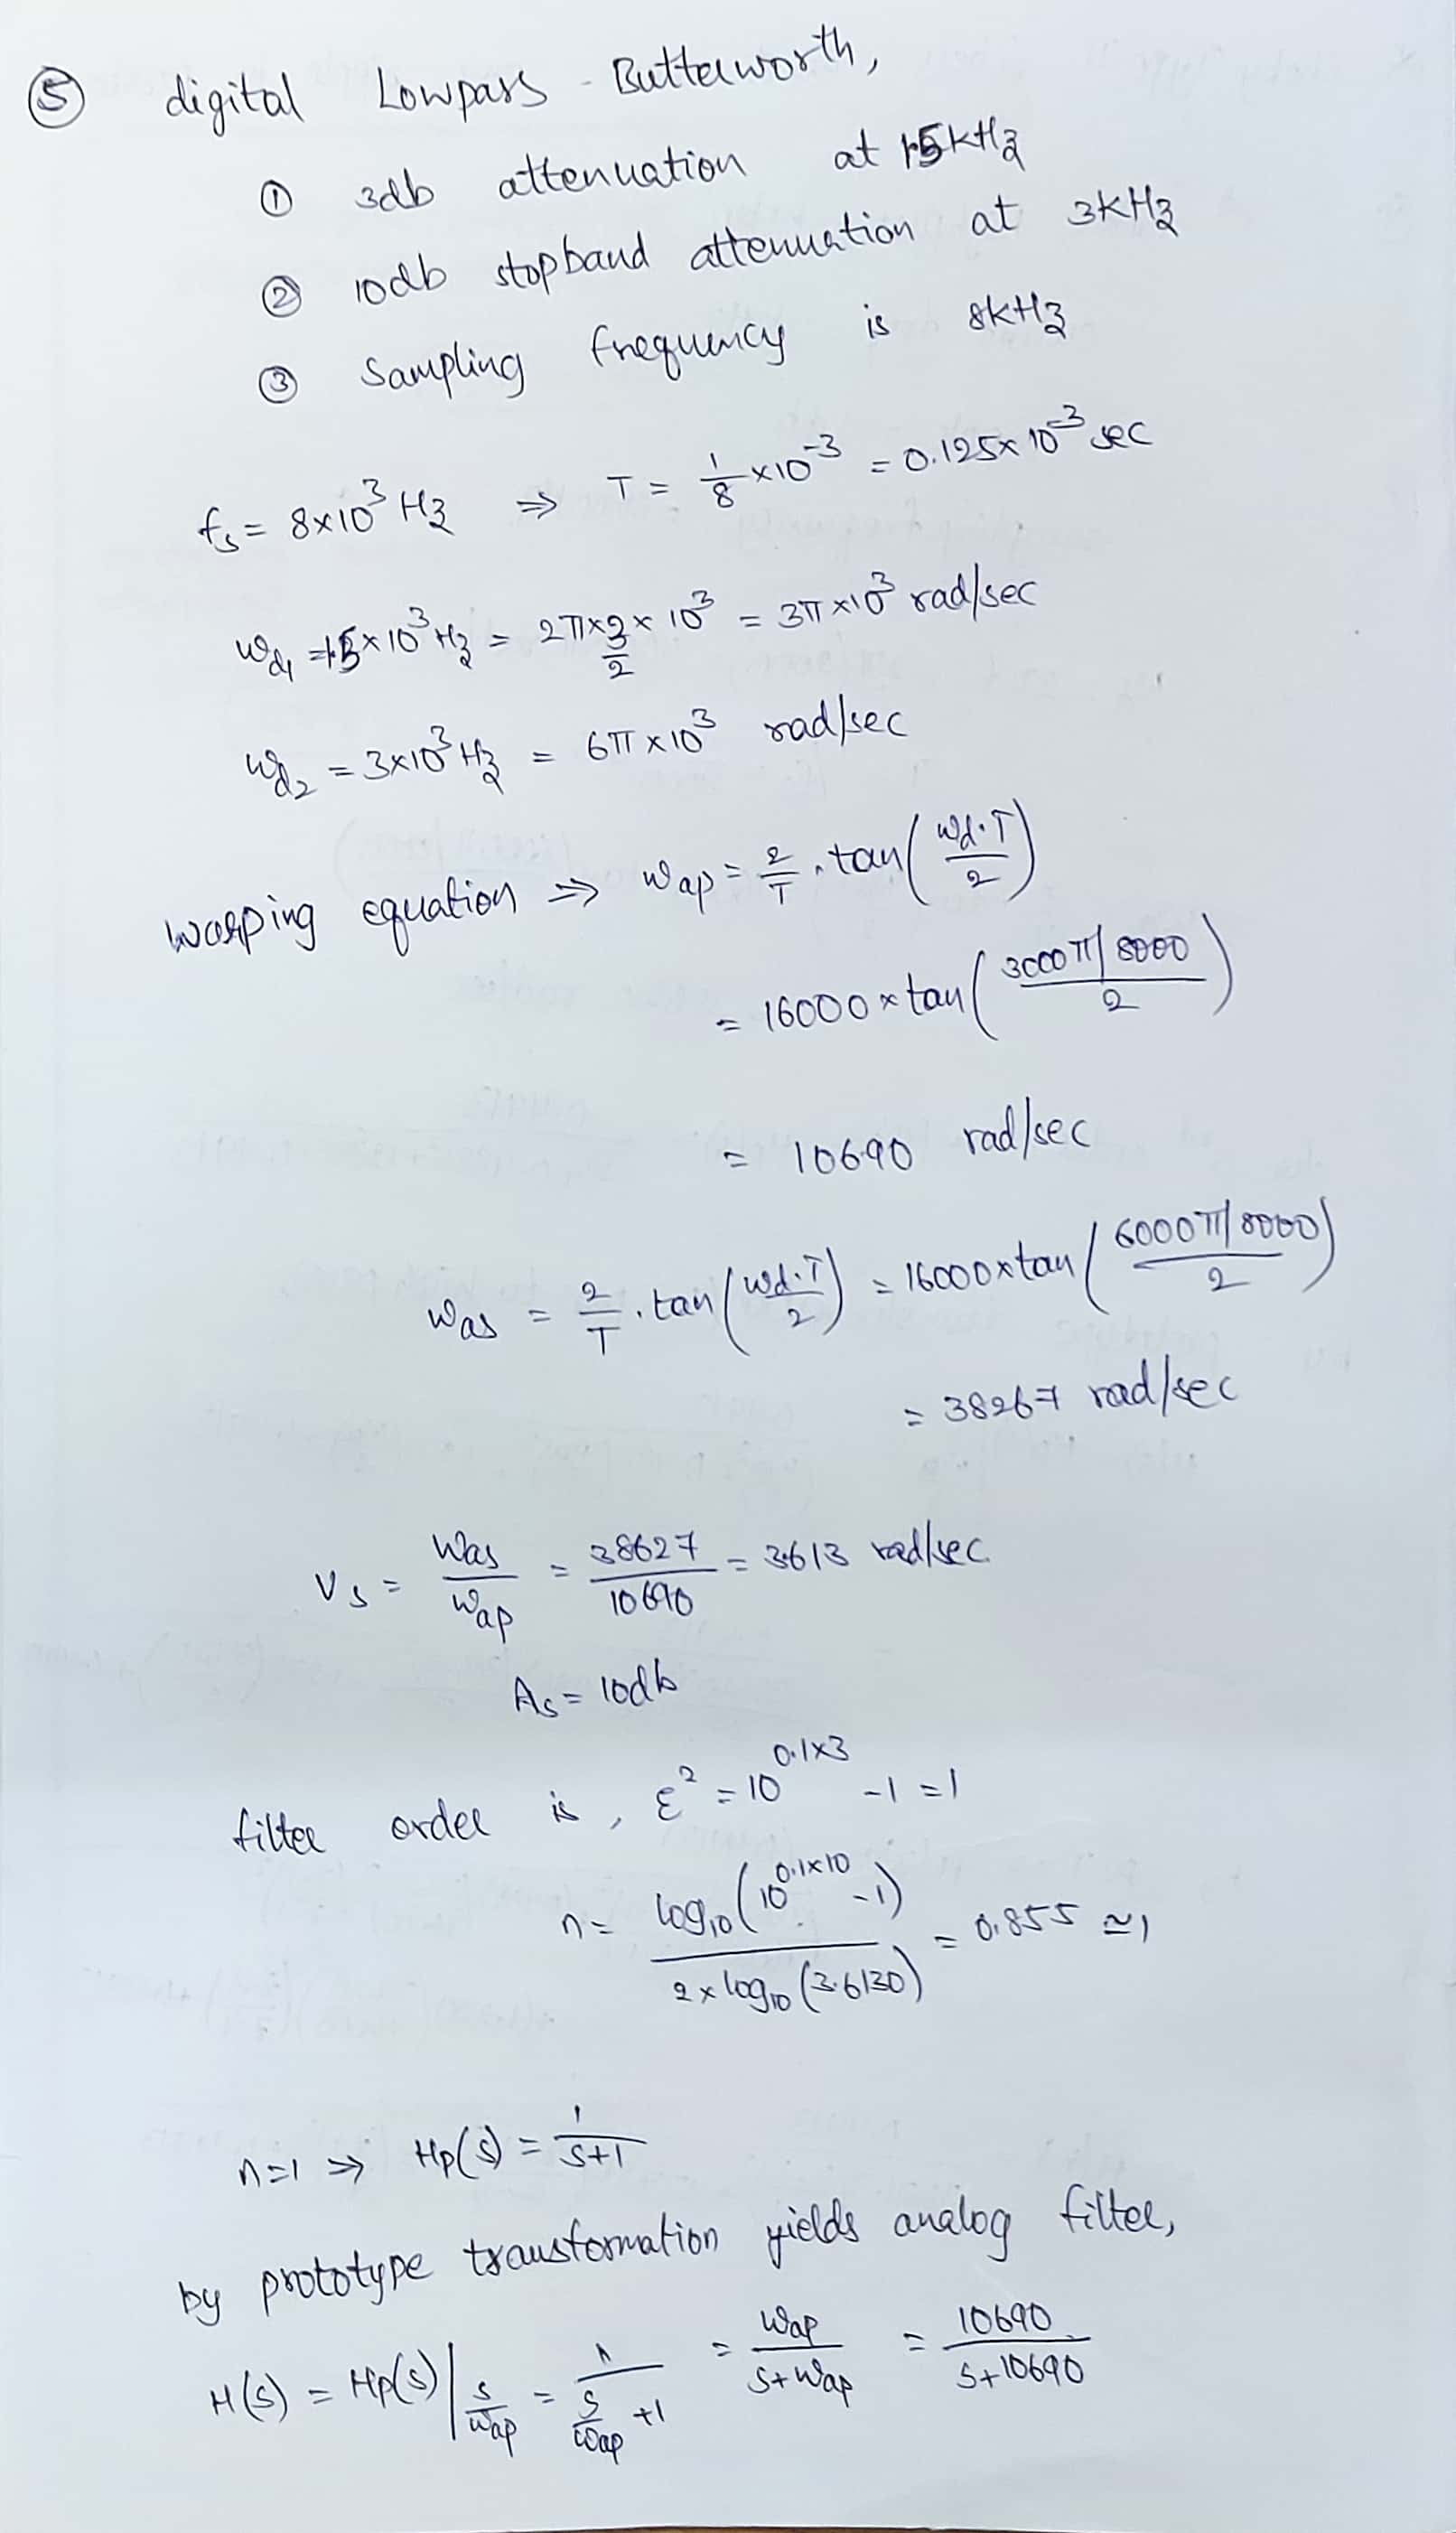

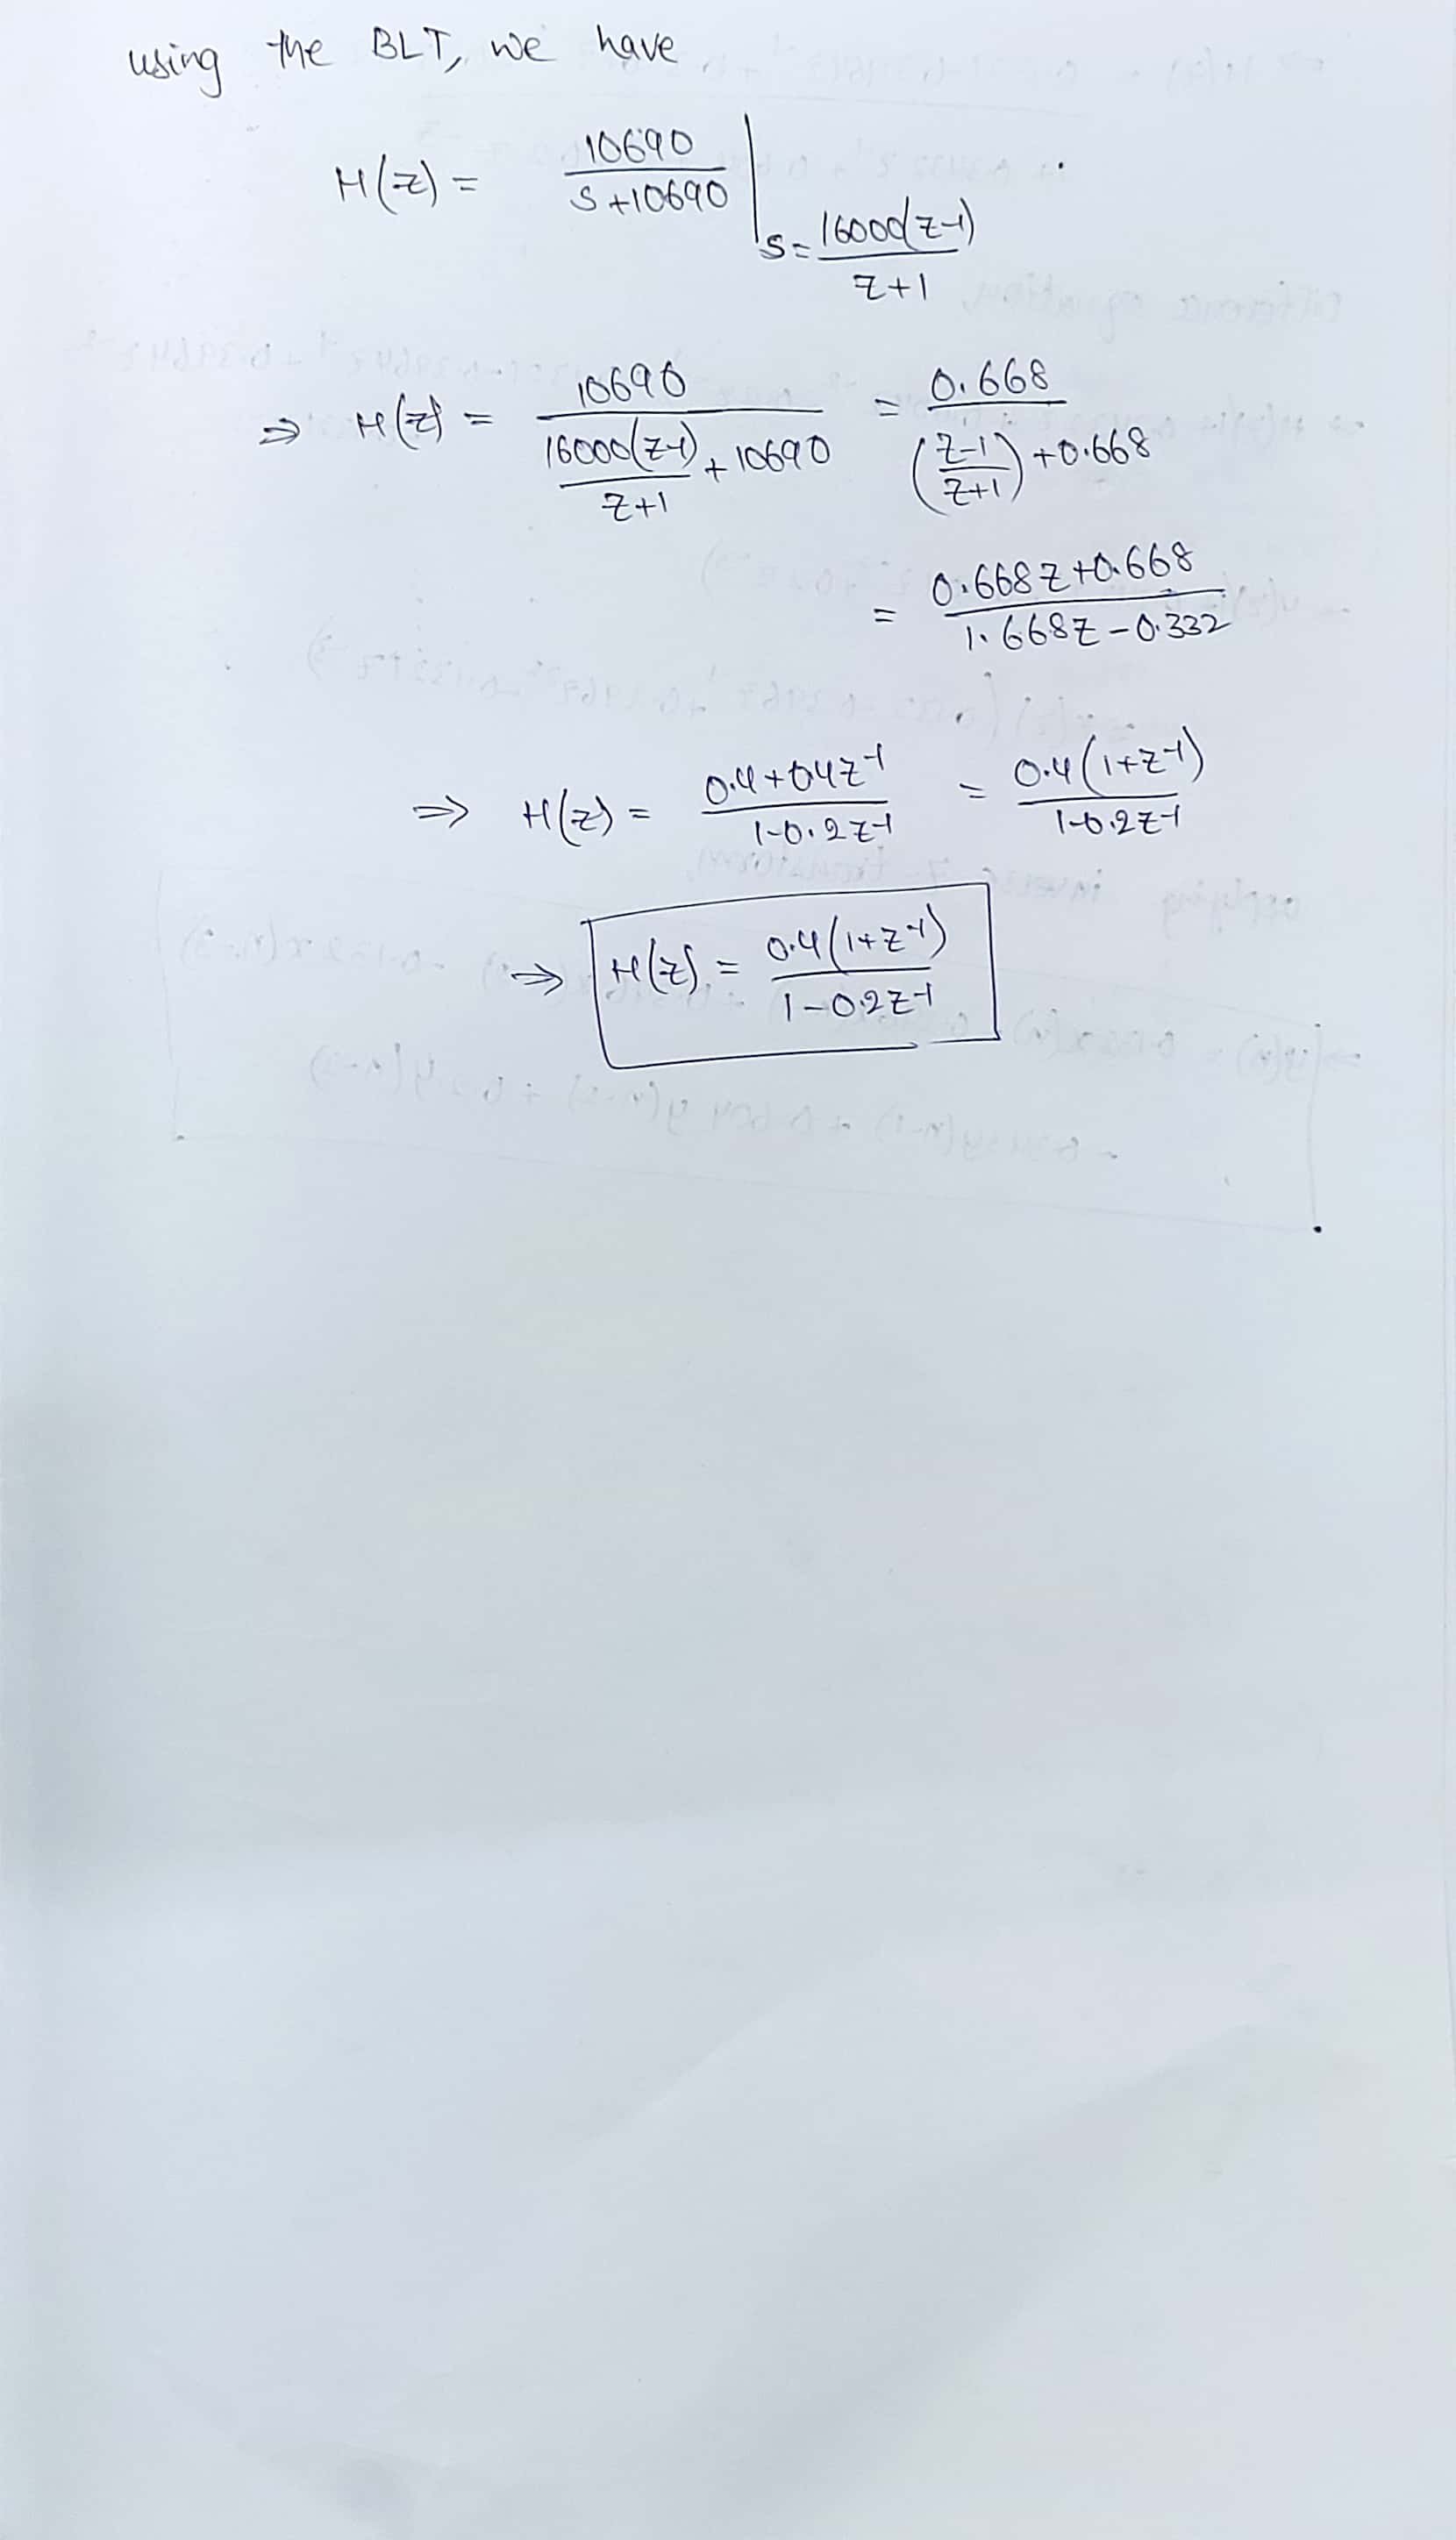

In [122]:
#numerator and denominator are obtaine from above
numer_5=[0.4,0.4]
denom_5=[1,-0.2]

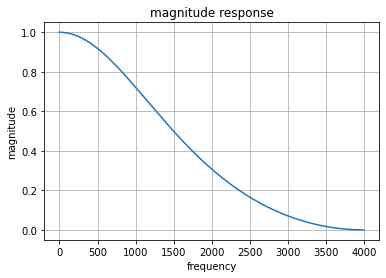

In [191]:
#magnitude response

w5,h5=signal.freqz(b=numer_5,a=denom_5,worN=1000)
f5=w5*8000/(2*np.pi)
plt.plot(f5,h5)
plt.title('magnitude response')
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.grid()
plt.show()

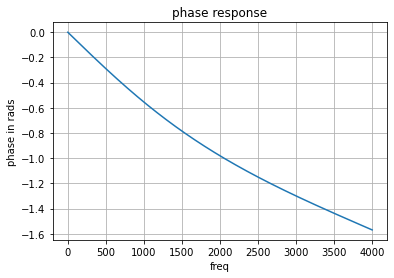

In [232]:
#Phase response

plt.plot(f5,np.angle(h5))
plt.title('phase response')
plt.xlabel('freq')
plt.ylabel('phase in rads')
plt.grid()
plt.show()

## QUESTION 6

In [83]:
#consider a random sequence x_6(n)

def x_6(n):
    x_6=[]
    for i in range(n):
        x_6.append(random.random())
    return x_6

#random sequnece of length 1024
x_1024=x_6(1024)

### PART A

In [84]:
# defining DFT

def DFT(x,N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X


#we are using perf_counter from time libarary
#difference of start and end variables gives the time of execution of the program in between the start and end

In [85]:
# time taken for DFT

def DFT_time(n):
    start = perf_counter()
    DFT(x_6(n),n)
    end = perf_counter()
    return end-start

time=DFT_time(1024)
print("The Time of Execution of above program is :",{time})
#here time is in seconds

The Time of Execution of above program is : {0.15623429999959626}


### PART B

In [91]:
#timetaken for FFT

def FFT_time(n):
    start = perf_counter()
    np.fft.fft(x_6(n))
    end = perf_counter()
    return end-start

time=FFT_time(1024)
print("The Time of Execution of above program is :",{time})


The Time of Execution of above program is : {0.0008138999992297613}


### PART C

In [92]:
DFT(x_1024,1024)


array([503.57489878 +0.j        ,   4.13376576+11.15969838j,
         5.5316798  -7.33702705j, ...,   1.81368309 +1.49473072j,
         5.5316798  +7.33702705j,   4.13376576-11.15969838j])

In [93]:
np.fft.fft(x_1024)

array([503.57489878 +0.j        ,   4.13376576+11.15969838j,
         5.5316798  -7.33702705j, ...,   1.81368309 +1.49473072j,
         5.5316798  +7.33702705j,   4.13376576-11.15969838j])

#we can see from above that,both the implementations are same 

### PART D

In [94]:
#samples from 1 to 2048

N=[]
for i in range(12):
    N.append(2**i)
N

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [95]:
import time

dft=[]
fft=[]
for k in N:
    dft.append(DFT_time(k))
    fft.append(FFT_time(k))

Text(0, 0.5, 'time taken')

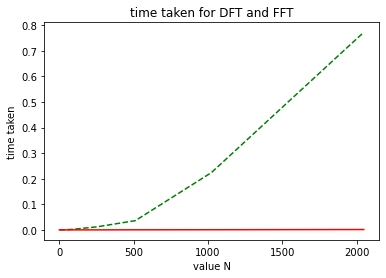

In [101]:
#plt.subplot(2,1,1)
plt.plot(N,dft,linestyle='dashed',color='green')
plt.plot(N,fft,color='red')
plt.title('time taken for DFT and FFT')
plt.xlabel('value N')
plt.ylabel('time taken')

#here green represents the Time for DFT plot
#here Red represents the time for FFT plot

#we can observe that time timen for DFT increase as value N increases,but time for FFT is not changing as DFT changes

## QUESTION 7

In [128]:
#input
x0 = [1,1,1,1,0,0,0,0]
#initialize the outputs of three stages i.e x1,x2,x3 as x i.e zero matrix 
x = [0,0,0,0,0,0,0,0]

x1 = x.copy()
x2 = x.copy()
x3 = x.copy()

In [129]:
#  Finding the twiddle Factor

w=exp(-1j*2*np.pi/8)

w0=1
w1=w
w2=w**2
w3=w**3

In [145]:
start_time7=perf_counter()
#  Stage 1

n=len(x1)
for i in range(n):
    if(i<n/2):
        if(i%2==0):
            x1[i]=x0[i]+x0[int((n/2+i)%8)]
        else:
            x1[i]=x0[i-1]-x0[int((n/2+i)%8)]
    else:
        if(i%2==0):
            x1[i]=x0[int((n/2+i+1))%8]+x0[i+1]
        else:
            x1[i]=x0[int((n/2+i)%8)]-x0[i]


In [146]:
#stage2

x2[0] = x1[0] + w0 * x1[2]
x2[1] = x1[1] + w2 * x1[3]
x2[2] = x1[0] - w0 * x1[2]
x2[3] = x1[1] - w2 * x1[3]

x2[4] = x1[4] + w0 * x1[6]
x2[5] = x1[5] + w2 * x1[7]
x2[6] = x1[4] - w0 * x1[6]
x2[7] = x1[5] - w2 * x1[7]

In [147]:
#  Stage 3
for i in range(n):
    if(i<n/2):
        x3[i]=x2[i]+(w**i)*x2[int(n/2+i)]
    else:
        x3[i]=x2[int(i-n/2)]-(w**(i-n/2))*x2[i]

End_time7=perf_counter()

Output:  [(4+0j), (1-2.41j), 0j, (1-0.41j), 0j, (1+0.41j), 0j, (1+2.41j)]
Time taken :  1.0528167999982543


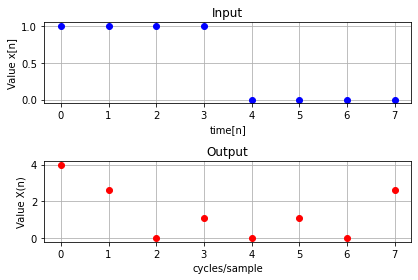

In [148]:
X=[round(ele,2) for ele in x3]
print('Output: ' , X)
print('Time taken : ', End_time-start_time)

n=np.arange(8)

plt.subplot(2, 1, 1)
plt.plot(n, x0, 'bo')
plt.tight_layout()
plt.xlabel('time[n]')
plt.ylabel('Value x[n]')
plt.title('Input')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(n, abs(np.array(x3)), 'ro')
plt.xlabel('cycles/sample')
plt.ylabel('Value X(n)')
plt.title('Output')
plt.tight_layout()
plt.grid()
plt.show()

## QUESTION 8

In [157]:
#input
x0 = [1,1,1,1,0,0,0,0]
#initialize the outputs of three stages i.e x1,x2,x3 as x i.e zero matrix 
x = [0,0,0,0,0,0,0,0]

x1 = x.copy()
x2 = x.copy()
x3 = x.copy()

In [158]:
# Finding the twiddle Factor

w = exp(-1j*2*np.pi/8)
w0 = 1
w1 = w
w2 = w**2
w3 = w**3




In [159]:
start_time8=perf_counter()

# Stage 1

n=len(x0)
for i in range(n):
    if(i<n/2):
        x1[i]=x0[i]+x[int(n/2+1)]
    else:
        x1[i]=-x0[i]+x0[int(i-n/2)]

In [160]:
#  Stage 2

x2[0] = x1[0] + x1[2]
x2[1] = x1[1] + x1[3]
x2[2] = x1[0] - x1[2]
x2[3] = x1[1] - x1[3]

x2[4] = x1[4] + w2 * x1[6]
x2[5] = w1*x1[5] + w3 * x1[7]
x2[6] = -w2*x1[6] + w0 * x1[4]
x2[7] = -w3*x1[7] + w1 * x1[5]

In [161]:
#  Stage 3

x3[0] = x2[0] + x2[1]
x3[4]= x2[0] - x2[1]
x3[2] = x2[2] + w2 * x2[3]
x3[6] = x2[2] - w2 * x2[3]
x3[1] = x2[4] +  x2[5]
x3[5] = x2[4] -  x2[5]
x3[3] = x2[6]+w2 * x2[7]
x3[7] = x2[6]- w2* x2[7]

end_time8=perf_counter()

output: [4, (1-2.41j), 0j, (1-0.41j), 0, (1+0.41j), 0j, (1+2.41j)]
Time taken: 0.888421699999526


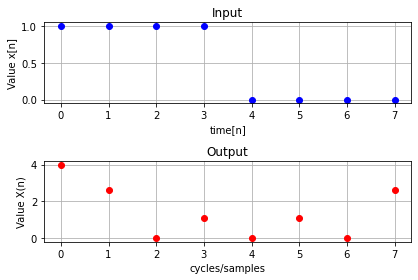

In [163]:
X=[round(ele,2) for ele in x3]
print('output:',X)
print('Time taken:',end_time8-start_time8)

plt.subplot(2, 1, 1)
n=np.arange(8)
plt.plot(n, x0, 'bo')
plt.tight_layout()
plt.xlabel('time[n]')
plt.ylabel('Value x[n]')
plt.title('Input')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(n,abs(np.array(x3)), 'ro')
plt.xlabel('cycles/samples')
plt.ylabel('Value X(n)')
plt.title('Output')
plt.tight_layout()
plt.grid()
plt.show()

#we can say that time taken by DIT is more than time taken by DIF..hence DIF is faster

## QUESTION 9

### PART A : LINEAR CONVOLUTION

In [169]:
#defining funtion for the linear convolution

def convolution(inputseq,impulseresponse):
        lengthA=np.size(inputseq)
        lengthB=np.size(impulseresponse)
        C = np.zeros(lengthA + lengthB -1)
        for m in np.arange(lengthA):
            for n in np.arange(lengthB):
                C[m+n] = C[m+n] + inputseq[m]*impulseresponse[n]
        return C 


output sequence= [1. 3. 6. 6. 4. 1.]


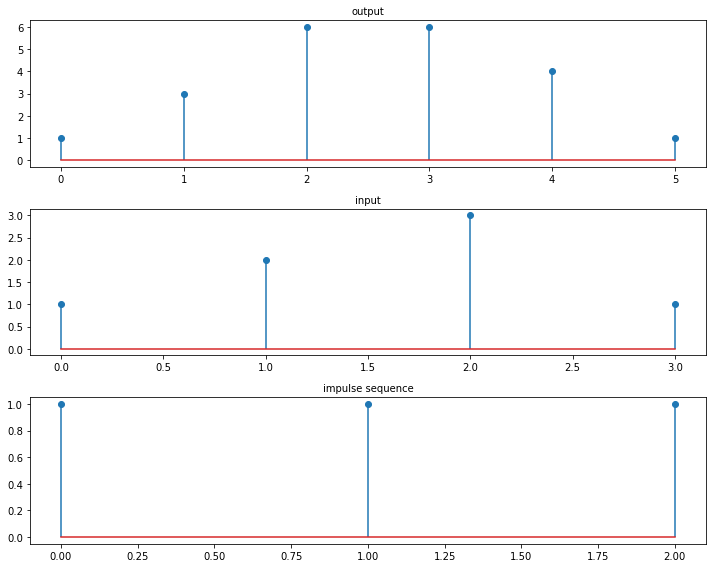

In [179]:
a1=[1,2,3,1] #input sequences
b1=[1,1,1]

plt.figure(figsize=(10,8))
n = np.arange(-10,10,1)
p=convolution(a1,b1) 
print("output sequence=",p)

plt.subplot(3,1,1)
plt.stem(p) 
plt.title('output',size=10)

plt.subplot(3,1,2)
plt.stem(a1)
plt.title('input',size=10)

plt.subplot(3,1,3)
plt.stem(b1)
plt.title('impulse sequence',size=10)

plt.tight_layout()
plt.show()

### PART B :CIRCULAR CONVOLUTION

In [174]:
x=[1,2,3,1]
h=[1,1,1]

m=len(x)
n=len(h)

In [175]:
#defining the shifter matrix
def shifter(matrix):
    last = matrix[len(matrix)-1]
    x = len(matrix)
    result = [0] * x
    for i in range(1,len(matrix)):
        result[i] = matrix[i-1]
        result[0] = last
    return result

In [176]:
#function for  circular convolution
def circularconv(x,h,n,m):
    ini_matrix = np.zeros((max(n,m),max(n,m)))
    for i in range(0,len(ini_matrix[0])):
        ini_matrix[0][i] = x[i]
    for i in range(1,max(n,m)):
        ini_matrix[i] = shifter(ini_matrix[i-1])
        final_matrix = np.transpose(ini_matrix)
        diff = abs(n-m)
    for i in range(m,m+diff):
        h.append(0)
        resultant = np.dot(final_matrix,h)
    return resultant

output sequence= [5. 4. 6. 6.]


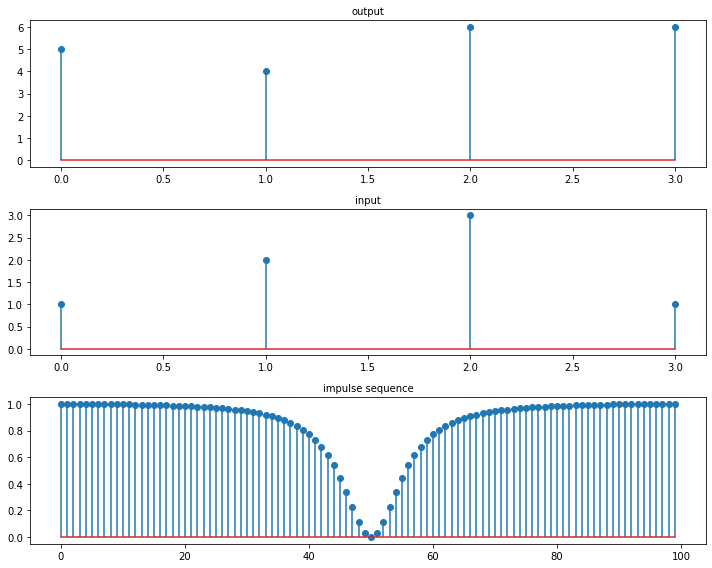

In [193]:
circular=circularconv(x,h,m,n)

print("output sequence=",circular) 
plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
plt.stem(circular)
plt.title('output',size=10)

plt.subplot(3,1,2)
plt.stem(x)
plt.title('input',size=10)

plt.subplot(3,1,3)
plt.stem(h)
plt.title('impulse sequence',size=10)

plt.tight_layout()
plt.show()